# FDM Mini Project - Group 09

### HR Analytics: Job Change of Data Scientists

<img src='https://blog.itsyourskills.com/wp-content/uploads/2020/01/HR-Analytics.jpg' width=600 />

## About Dataset

### Context and Content

This dataset pertains to a company specializing in Big Data and Data Science, aiming to hire data scientists from individuals who successfully complete company-conducted courses. Many individuals sign up for these training programs. The company is interested in identifying candidates who are genuinely committed to working for the company after training, as opposed to those seeking new employment opportunities. This distinction helps reduce costs, optimize training quality, course planning, and candidate categorization. The dataset contains information related to demographics, education, and experience gathered during candidate sign-up and enrollment.

The dataset's primary objective is to understand the factors influencing a person's decision to leave their current job, making it valuable for HR research. Using the dataset's credentials, demographics, and experience data, you can predict the probability of a candidate seeking new employment or remaining with the company. Additionally, it allows for interpreting the factors that influence employees' decisions.

The dataset is divided into training and test sets. The test set does not include the target variable, but a test target values data file is provided for related tasks. A sample submission corresponds to the enrollee_id of the test set and includes columns for enrollee_id and target.

**Note:**

- The dataset exhibits class imbalance.
- Most features are categorical (Nominal, Ordinal, Binary), with some having high cardinality.
- Missing value imputation may be required as part of your data preprocessing pipeline.

**Features**

1. enrollee_id: Unique ID for the candidate
2. city: City code
3. city_development_index: Development index of the city (scaled)
4. gender: Gender of the candidate
5. relevent_experience: Relevant experience of the candidate
6. enrolled_university: Type of university course enrolled in (if any)
7. education_level: Education level of the candidate
8. major_discipline: Education major discipline of the candidate
9. experience: Total experience of the candidate in years
10. company_size: Number of employees in the candidate's current employer's company
11. company_type: Type of the candidate's current employer
12. last_new_job: Difference in years between the candidate's previous job and current job
13. training_hours: Number of training hours completed
14. target: Binary classification target (0 – Not looking for a job change, 1 – Looking for a job change)

**Inspiration**

- Predict the probability of a candidate working for the company.
- Interpret models in a way that illustrates the features influencing a candidate's decision..

## Import Libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [4]:
Url = 'https://raw.githubusercontent.com/IT21313370/FDM_Mini_Project_Y3S1/main/Data%20Set/Training_set.csv?token=GHSAT0AAAAAACIAAEMAA36PKSXZPBYECMJIZJAM4UA'
OriginalDataset= pd.read_csv(Url, encoding = "latin-1")
OriginalDataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


##Exploring the Dataset

In [5]:
OriginalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
OriginalDataset.shape

(19158, 14)

In [7]:
OriginalDataset.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Visualization

##Original Dataset

##Bar Plots

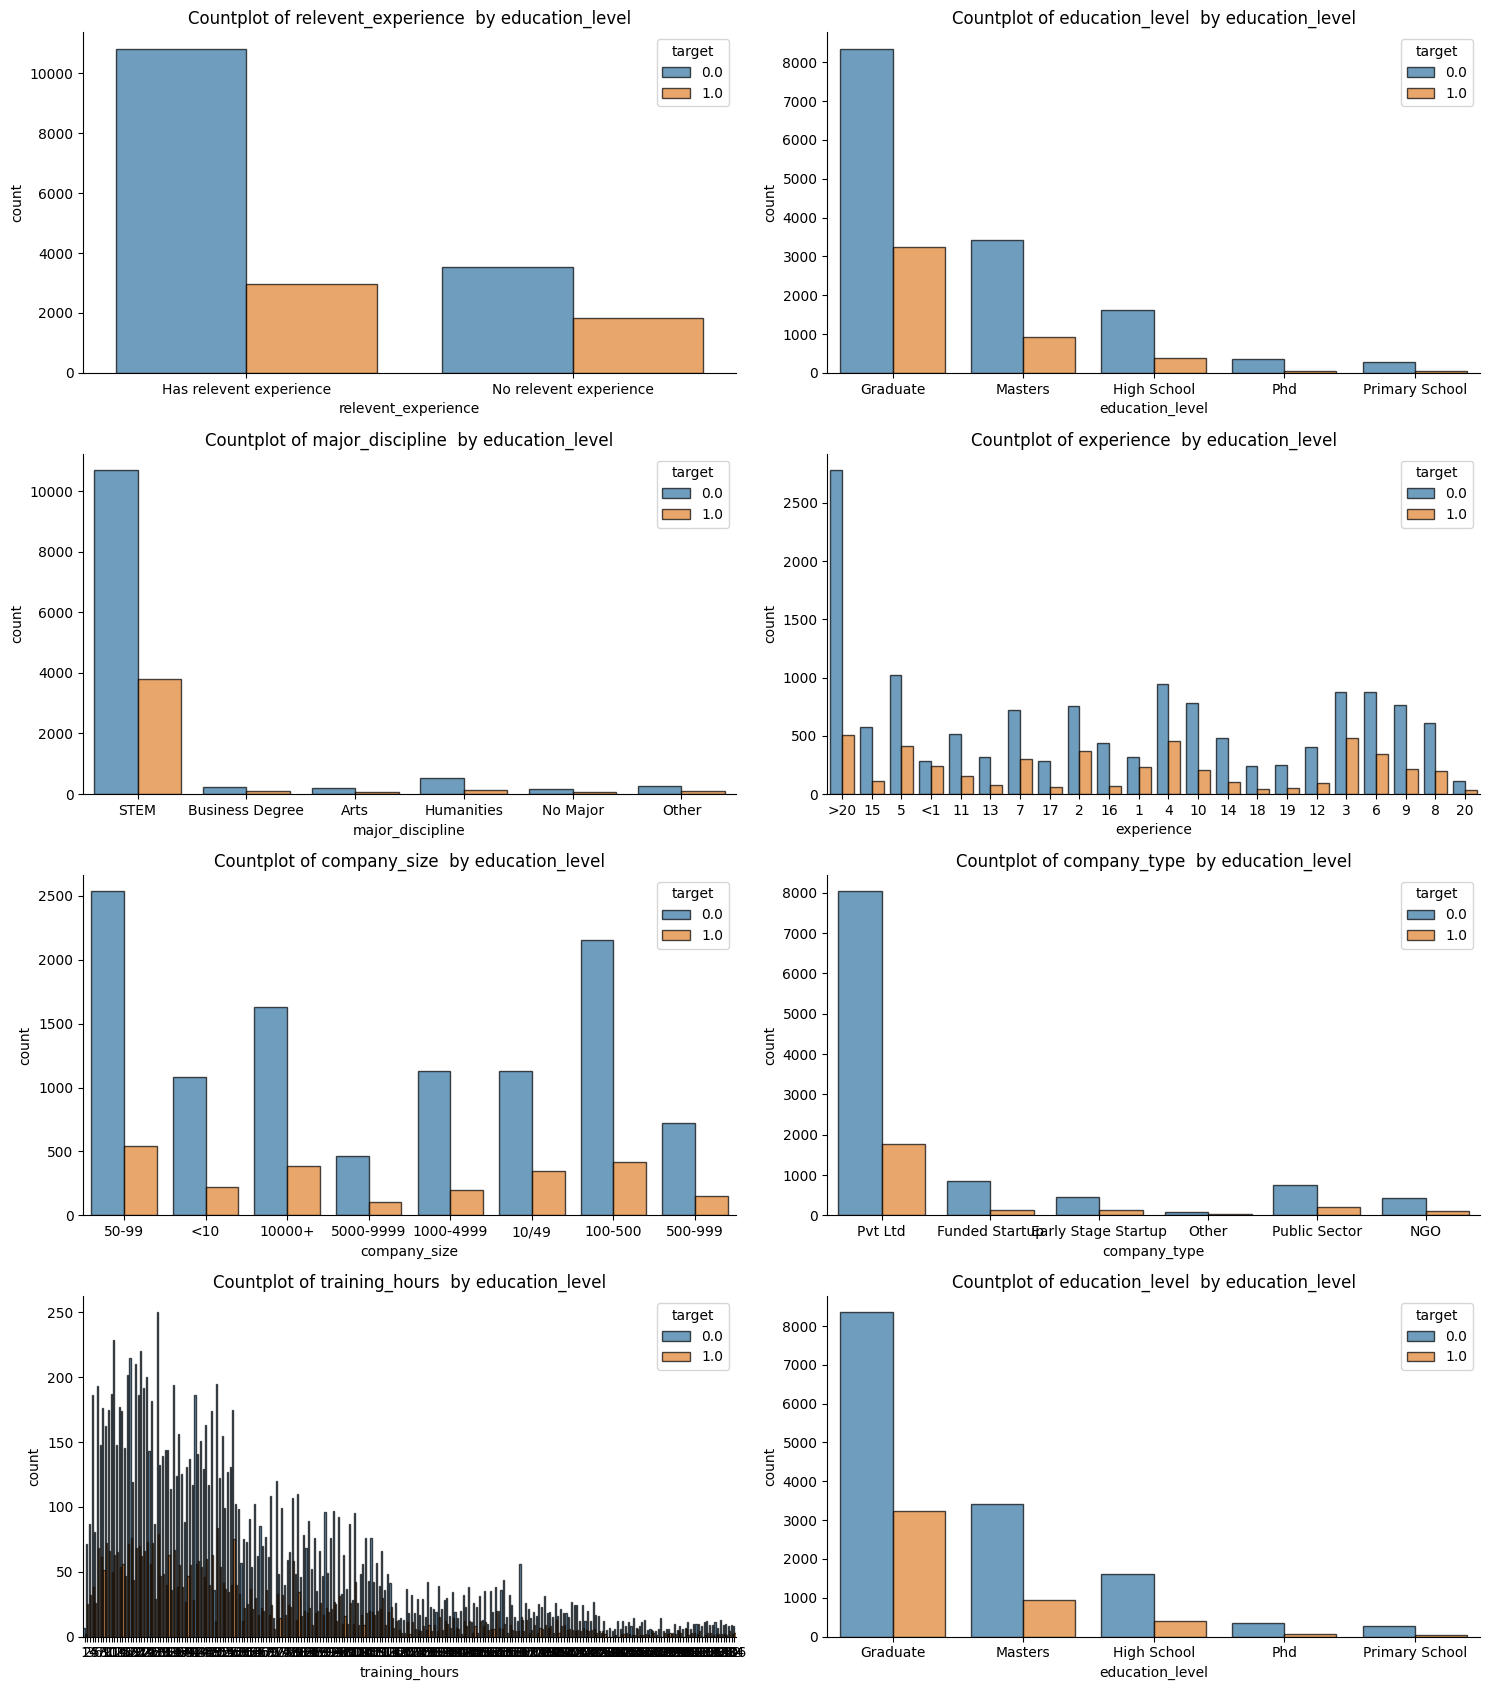

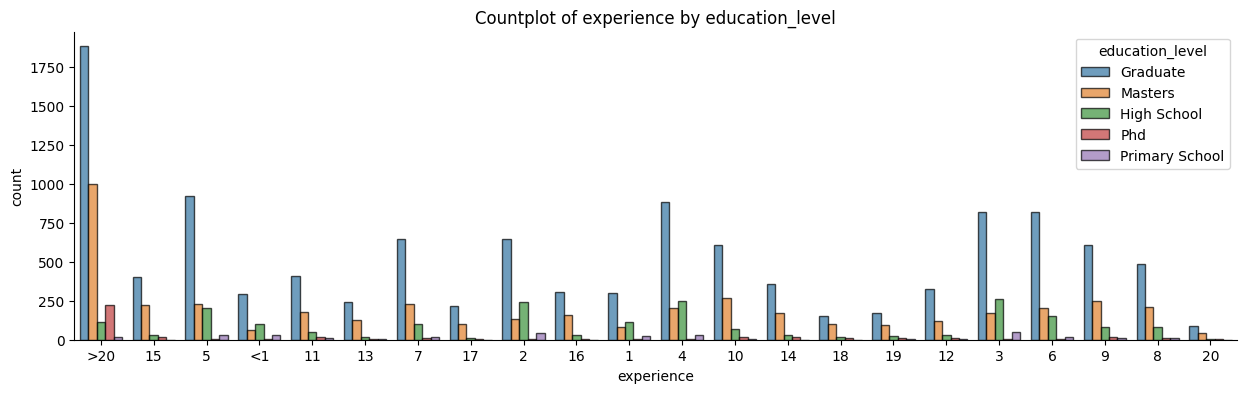

In [8]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[15,17])
fft=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type", "training_hours","education_level"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=OriginalDataset)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()



plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='education_level',edgecolor="black", alpha=0.7, data=OriginalDataset)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

##Target

- 0-Not looking for a job change
- 1-Looking for a job change

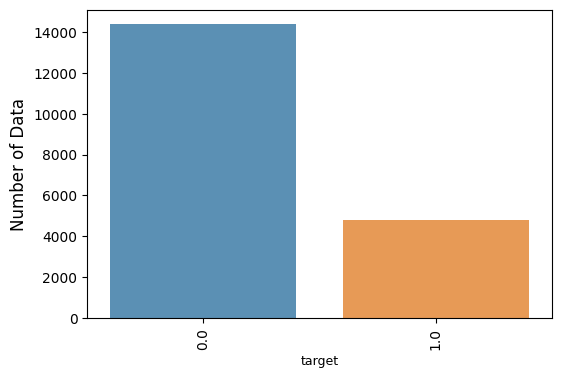

In [9]:
mnj = OriginalDataset['target'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=mnj.index, y=mnj.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show()

- According to bar chart data set is unbalenced.

---



# Preprocessing

In [10]:
ProcessDataset = OriginalDataset.copy()

In [11]:
# Creating a function that converts all values of needed attributes into numbers

def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0

def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0

def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1
    if x=='Part time course':   return 2

# In education level column, Let's consider null values as 'High School' for the rows
# which have fill the 'enrolled_university' & 'major_discipline' columns.

def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1
    if x=='High School'    :   return 2
    if x=='Phd'            :   return 3
    if x=='Primary School' :   return 4

def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1
    if x=='Arts'                   :   return 2
    if x=='Humanities'             :   return 3
    if x=='No Major'               :   return 4
    if x=='Other'                  :   return 5


def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1
    if x=='2'       :   return 2
    if x=='3'       :   return 3
    if x=='4'       :   return 4
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8
    if x=='9'       :   return 9
    if x=='10'      :   return 10
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13
    if x=='14'      :   return 14
    if x=='15'      :   return 15
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19
    if x=='20'      :   return 20
    if x=='>20'     :   return 21

def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1
    if x=='Early Stage Startup'   :   return 2
    if x=='Other'                 :   return 3
    if x=='Public Sector'         :   return 4
    if x=='NGO'                   :   return 5

def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1
    if x=='100-500'      :   return 2
    if x=='1000-4999'    :   return 3
    if x=='10000+'       :   return 4
    if x=='50-99'        :   return 5
    if x=='500-999'      :   return 6
    if x=='5000-9999'    :   return 7

def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1
    if x=='2'            :   return 2
    if x=='3'            :   return 3
    if x=='4'            :   return 4
    if x=='>4'           :   return 5

In [12]:
ProcessDataset['gender'] = OriginalDataset['gender'].apply(gender_to_numeric)
ProcessDataset['relevent_experience'] = OriginalDataset['relevent_experience'].apply(rel_experience)
ProcessDataset['enrolled_university'] = OriginalDataset['enrolled_university'].apply(enrollment)
ProcessDataset['education_level'] = OriginalDataset['education_level'].apply(edu_level)
ProcessDataset['major_discipline'] = OriginalDataset['major_discipline'].apply(major)
ProcessDataset['experience'] = OriginalDataset['experience'].apply(experience)
ProcessDataset['company_type'] = OriginalDataset['company_type'].apply(company_t)
ProcessDataset['company_size'] = OriginalDataset['company_size'].apply(company_s)
ProcessDataset['last_new_job'] = OriginalDataset['last_new_job'].apply(last_job)

In [13]:
ProcessDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  float64
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     18772 non-null  float64
 6   education_level         18698 non-null  float64
 7   major_discipline        16345 non-null  float64
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  float64
 10  company_type            13018 non-null  float64
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(10), int64(3), object(1)
me

In [14]:
ProcessDataset.duplicated().sum()
OriginalDataset.duplicated().sum()

0

In [15]:
correlation_with_target = ProcessDataset.corr()['target'].sort_values(ascending=True)
print(correlation_with_target)

city_development_index   -0.341665
experience               -0.176724
relevent_experience      -0.128430
education_level          -0.091101
last_new_job             -0.082607
training_hours           -0.021577
major_discipline         -0.014854
company_size             -0.008695
gender                    0.018034
company_type              0.025326
enrollee_id               0.049475
enrolled_university       0.106561
target                    1.000000
Name: target, dtype: float64


<ipython-input-15-52fd0a2396ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = ProcessDataset.corr()['target'].sort_values(ascending=True)


Considering the correlation

- city_development_index   -0.341665

- experience               -0.176724

- relevent_experience      -0.128430

- education_level          -0.090062

- last_new_job             -0.082607

will be considered for the model development.

In [16]:
ProcessDataset.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Fill 'education_level' column null values

In [17]:
# Fill null values in 'education_level' with 'High School' for rows where at least one of 'enrolled_university' or 'major_discipline' columns is not null
ProcessDataset.loc[ProcessDataset['enrolled_university'].notnull() | ProcessDataset['major_discipline'].notnull(), 'education_level'] = 2

In [18]:
# Fill remaining null values in 'education_level' with 4 (we assumed at least a person who applied for this job have completed atleast primary education)
ProcessDataset['education_level'].fillna(4, inplace=True)

### Fill 'experience' column null values

In [19]:
ProcessDataset.loc[ProcessDataset['last_new_job'].notnull() | ProcessDataset['company_type'].notnull() | ProcessDataset['company_size'].notnull(), 'experience'] = 0

In [20]:
ProcessDataset['experience'].fillna(0, inplace=True)

### 'last_new_job' column

In [21]:
mean_last_new_job = ProcessDataset.loc[ProcessDataset['company_type'].notnull() | ProcessDataset['company_size'].notnull() | ProcessDataset['relevent_experience'] == 1, 'last_new_job'].mean()
ProcessDataset['last_new_job'].fillna(mean_last_new_job, inplace=True)

In [22]:
ProcessDataset.duplicated().sum()

0

In [23]:
ProcessDataset.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level              0
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

## Drop Columns

In [24]:
columns_to_drop = ['city', 'training_hours', 'major_discipline', 'company_size', 'gender', 'company_type', 'enrollee_id', 'enrolled_university']
ProcessDataset= ProcessDataset.drop(columns=columns_to_drop)
ProcessDataset.head(2)

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1.0
1,0.776,0,2.0,0.0,5.0,0.0


In [25]:
# Convert the 'target' to integers
ProcessDataset['target'] = ProcessDataset['target'].astype(int)

In [26]:
ProcessDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   relevent_experience     19158 non-null  int64  
 2   education_level         19158 non-null  float64
 3   experience              19158 non-null  float64
 4   last_new_job            19158 non-null  float64
 5   target                  19158 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 898.2 KB


In [27]:
ProcessDataset.head(2)

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1
1,0.776,0,2.0,0.0,5.0,0


In [28]:
OriginalDataset.duplicated().sum()

0

In [29]:
ProcessDataset.isnull().sum()

city_development_index    0
relevent_experience       0
education_level           0
experience                0
last_new_job              0
target                    0
dtype: int64

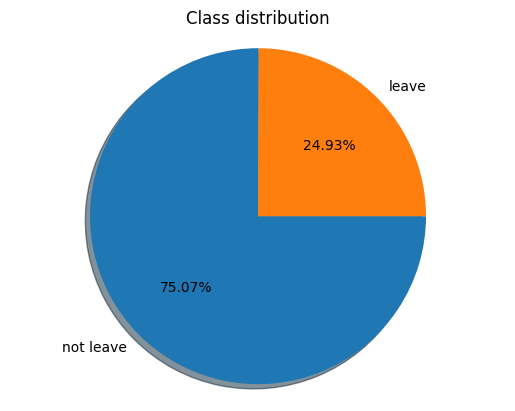

# samples associated with not  leaving: 14381
# samples associated with leaving: 4777


In [30]:
class_occur = ProcessDataset['target'].value_counts()
class_names = ['not leave','leave']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with not  leaving: {}".format(class_occur[0]))
print("# samples associated with leaving: {}".format(class_occur[1]))

In [31]:
X = ProcessDataset.drop('target', axis=1)  # Features
y = ProcessDataset['target']  # target variable

In [32]:
X.shape
y.shape

(19158,)

In [33]:
y.value_counts()

0    14381
1     4777
Name: target, dtype: int64

In [34]:
# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(ProcessDataset.loc[:,ProcessDataset.columns!='target'], ProcessDataset['target'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (28762, 5)
Shape of y: (28762,)


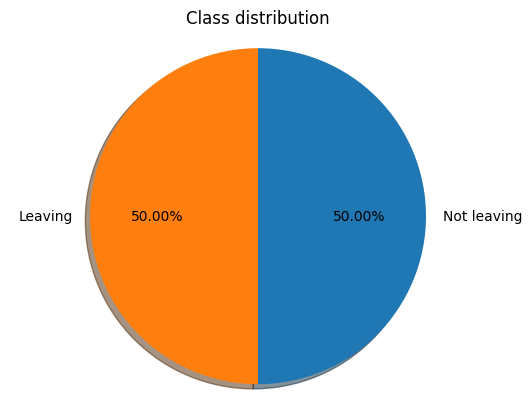

# samples associated with not leaving: 14381
# samples associated with leaving: 14381


In [35]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['Not leaving', 'Leaving']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with not leaving: {}".format(class_counts[0]))
print("# samples associated with leaving: {}".format(class_counts[1]))

#Modeling

In [51]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)

    scaler = StandardScaler()
    x_train =scaler.fit_transform(x_train)
    x_test =scaler.transform(x_test)

    # train the model
    model.fit(x_train, y_train)


    y_pred=model.predict(x_test)


        # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



    return {'acc': accuracy, 'prec': precision, 'rec': recall, 'f1': f1,
             'auc':auc }



## Decision Tree Classifier Model

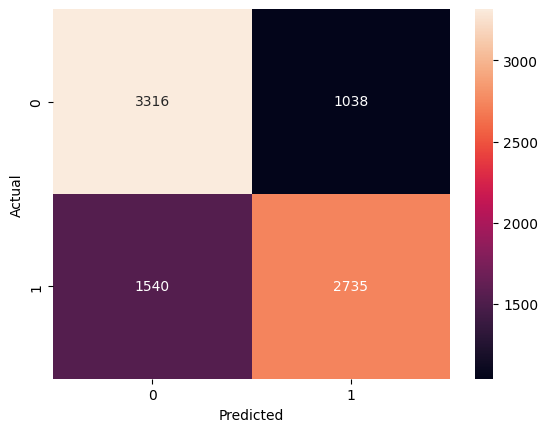

Accuracy: 0.7012400046355314
Precision: 0.7248873575404188
Recall: 0.639766081871345
F1 Score: 0.6796719681908548
Area Under Curve: 0.7006823059793106


In [52]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini'
                            , max_depth=10
                            , max_features='sqrt'
                            , min_samples_leaf= 1
                            , min_samples_split=2)
DT_eval = classify(DT, X, y)

print('Accuracy:',DT_eval['acc'])
print('Precision:', DT_eval['prec'])
print('Recall:', DT_eval['rec'])
print('F1 Score:', DT_eval['f1'])
print('Area Under Curve:', DT_eval['auc'])



## Logistic Regression Model

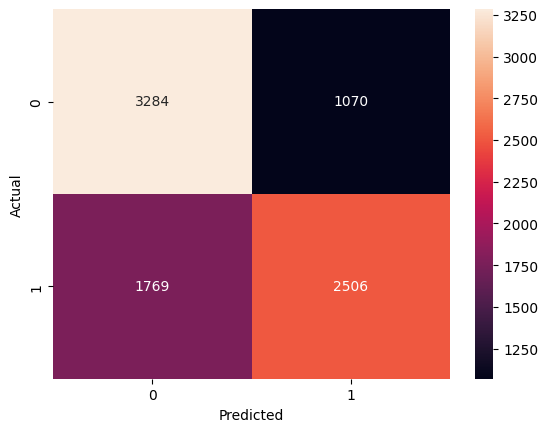

Accuracy: 0.6709931625912621
Precision: 0.7007829977628636
Recall: 0.5861988304093567
F1 Score: 0.638390014010954
Area Under Curve: 0.6702238984384863


In [73]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


LR_eval = classify(LR, X, y)

print('Accuracy:',LR_eval['acc'])
print('Precision:', LR_eval['prec'])
print('Recall:', LR_eval['rec'])
print('F1 Score:', LR_eval['f1'])
print('Area Under Curve:', LR_eval['auc'])



## Random Forest Classifier Model

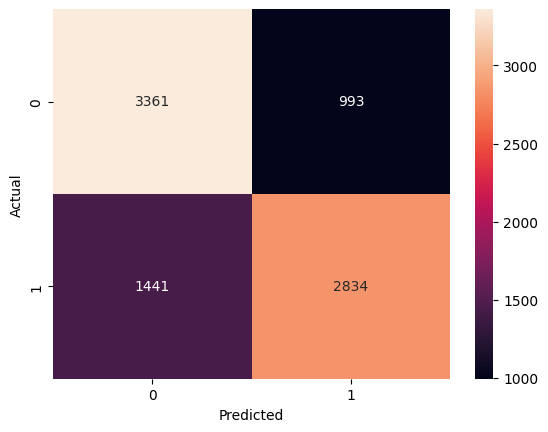

Accuracy: 0.717927917487542
Precision: 0.7405278285863601
Recall: 0.6629239766081871
F1 Score: 0.6995803505307332
Area Under Curve: 0.7174289152678051


In [74]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF_eval = classify(RF, X, y)

print('Accuracy:',RF_eval['acc'])
print('Precision:', RF_eval['prec'])
print('Recall:', RF_eval['rec'])
print('F1 Score:', RF_eval['f1'])
print('Area Under Curve:', RF_eval['auc'])



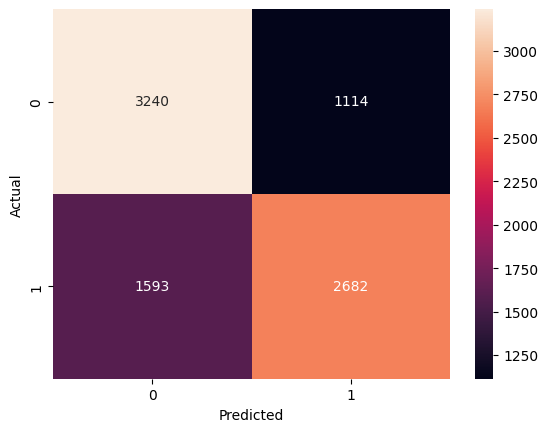

Accuracy: 0.6862904160389385
Precision: 0.7065331928345627
Recall: 0.6273684210526316
F1 Score: 0.6646016602651468
Area Under Curve: 0.6857558687716074


In [75]:
from sklearn.svm import SVC,SVR
SVM = SVC(kernel="rbf",C=1,probability=True)


SVM_eval = classify(SVM , X, y)

print('Accuracy:',SVM_eval['acc'])
print('Precision:', SVM_eval['prec'])
print('Recall:', SVM_eval['rec'])
print('F1 Score:', SVM_eval['f1'])
print('Area Under Curve:', SVM_eval['auc'])




## Gaussian Naive Bayes Model

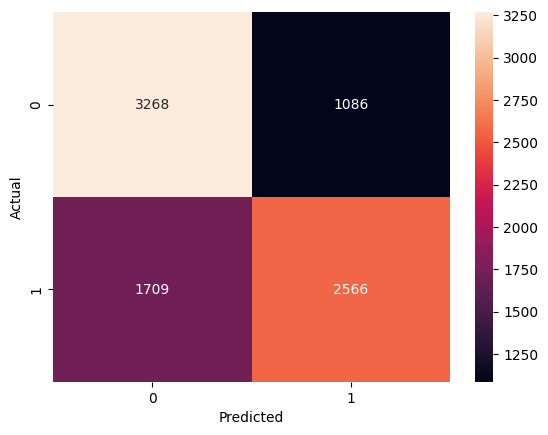

Accuracy: 0.6760922470738209
Precision: 0.7026286966046003
Recall: 0.600233918128655
F1 Score: 0.6474075942979691
Area Under Curve: 0.6754040513932205


In [76]:
from sklearn.naive_bayes import GaussianNB
NB =GaussianNB()

NB_eval = classify(NB, X, y)

print('Accuracy:',NB_eval['acc'])
print('Precision:', NB_eval['prec'])
print('Recall:', NB_eval['rec'])
print('F1 Score:', NB_eval['f1'])
print('Area Under Curve:', NB_eval['auc'])

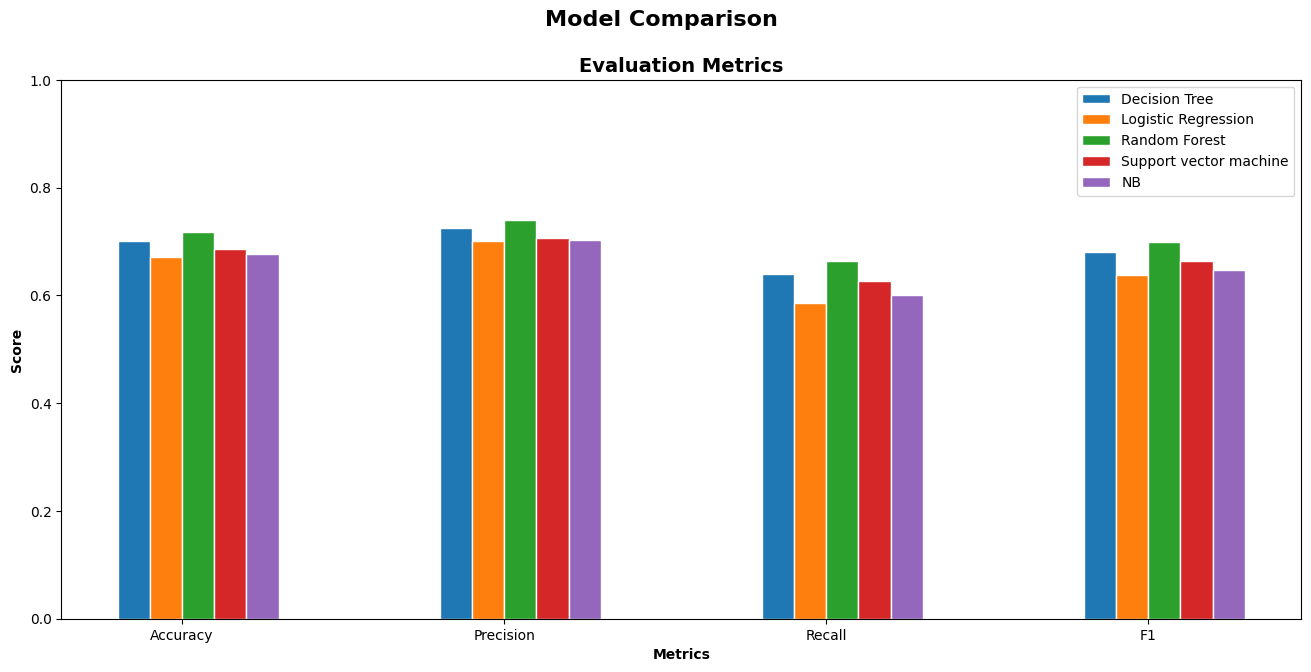

In [84]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(16)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
dt_score = [DT_eval['acc'], DT_eval['prec'], DT_eval['rec'], DT_eval['f1']]
lr_score = [LR_eval['acc'], LR_eval['prec'], LR_eval['rec'], LR_eval['f1']]
rf_score = [RF_eval['acc'], RF_eval['prec'], RF_eval['rec'], RF_eval['f1']]
svm_score = [SVM_eval['acc'], SVM_eval['prec'], SVM_eval['rec'], SVM_eval['f1']]
nb_score  = [NB_eval['acc'], NB_eval['prec'], NB_eval['rec'], NB_eval['f1']]

## Set position of bar on x axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5  =[x + barWidth for x in r4]


## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, svm_score, width=barWidth, edgecolor='white', label='Support vector machine')
ax1.bar(r5, nb_score, width=barWidth, edgecolor='white', label='NB')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
